In [3]:
import warnings
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import datetime
plt.style.use('fivethirtyeight')

from numpy import genfromtxt
#data_mood_pandas = pandas.read_csv('Data/list_includingT.csv')
data_mood_pandas = pd.read_csv('Data/list_includingT.csv')
#data_mood = genfromtxt('Data/dataset_mood_smartphone_dates.csv', delimiter=',')
#print(data_mood_pandas['Mood'])
#print(data_mood_pandas['Day'])
data_mood_pandas['Day'] = (pd.to_numeric(data_mood_pandas['Day'], downcast='integer'))
part1 = data_mood_pandas.loc[data_mood_pandas['Participant'] == 1]
part1_Mood = part1['Mood']/max(data_mood_pandas['Mood'])
print(part1_Mood)
index = pd.to_datetime(part1['Day'], unit = 'D')
y = pd.DataFrame(np.array(part1_Mood), index = index)

/Users/jerome/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


0     0.669643
1     0.678571
2     0.664286
3     0.685714
4     0.728571
5     0.642857
6     0.723214
7     0.707143
8     0.750000
9     0.685714
10    0.857143
11    0.803571
12    0.792857
13    0.642857
14    0.696429
15    0.685714
16    0.664286
17    0.728571
18    0.696429
19    0.696429
20    0.707143
21    0.792857
22    0.792857
23    0.750000
24    0.776786
25    0.857143
26    0.771429
27    0.685714
28    0.771429
29    0.707143
30    0.728571
31    0.835714
32    0.776786
33    0.814286
34    0.792857
35    0.814286
36    0.814286
37    0.771429
38    0.814286
39    0.803571
40    0.814286
41    0.750000
42    0.835714
43    0.857143
44    0.814286
45    0.857143
46    0.857143
Name: Mood, dtype: float64


In [6]:
# Define the p, d and q parameters to take any value between 0 and 2
p = range(5)
d = range(5)
q = range(5)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
pdq = [(x[0], x[1], x[2]) for x in list(itertools.product(p, d, q))]

In [7]:
for i in range(1,28):
    locals()['part{0}'.format(i)] = data_mood_pandas.loc[data_mood_pandas['Participant'] == i]
    locals()['part{0}_Mood'.format(i)] = data_mood_pandas.loc[data_mood_pandas['Participant'] == i]['Mood']/10
    
    
for participant in range(1, 28):
    
    index = pd.to_datetime(locals()['part{0}'.format(participant)]['Day'], unit = 'D')

    y = pd.DataFrame(np.array(locals()['part{0}_Mood'.format(participant)]), index = index)

    warnings.filterwarnings("ignore") # specify to ignore warning messages
    lowest_aic = 1000
    for param in pdq:
        #for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            #seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()
            if results.aic < lowest_aic:
                lowest_aic = results.aic
                new_param = param
            #print('ARIMA{}x - AIC:{}'.format(param, results.aic))
        except:
            continue
    print('Participant ', participant, new_param, ' AIC: ', lowest_aic)
#print(y)

Participant  1 (1, 0, 1)  AIC:  -143.3797573132377
Participant  2 (2, 0, 1)  AIC:  -73.00705369399934
Participant  3 (1, 0, 1)  AIC:  -174.23076152675887
Participant  4 (1, 1, 0)  AIC:  -128.11290048442777
Participant  5 (1, 0, 1)  AIC:  -123.37145662619389
Participant  6 (1, 0, 1)  AIC:  -63.26411963734169
Participant  7 (1, 0, 1)  AIC:  -173.63440218494515
Participant  8 (3, 1, 3)  AIC:  -106.03243171217828
Participant  9 (1, 0, 1)  AIC:  -114.33346590007852
Participant  10 (1, 1, 0)  AIC:  -99.85234016505113
Participant  11 (2, 0, 1)  AIC:  -109.36962819888753
Participant  12 (2, 0, 1)  AIC:  -197.7632181674221
Participant  13 (0, 1, 1)  AIC:  -153.24704156320217
Participant  14 (1, 0, 1)  AIC:  -195.8407943328409
Participant  15 (1, 0, 1)  AIC:  -129.70492690811753
Participant  16 (1, 0, 1)  AIC:  -156.4755782212078
Participant  17 (2, 0, 1)  AIC:  -107.43372210313294
Participant  18 (1, 0, 1)  AIC:  -152.57906170137466
Participant  19 (1, 1, 2)  AIC:  -75.0794325810269
Participant

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1)
SARIMAX: (0, 0, 1) x (0, 1, 0)
SARIMAX: (0, 0, 2) x (0, 1, 1)
SARIMAX: (0, 0, 2) x (1, 0, 0)


In [243]:
warnings.filterwarnings("ignore") # specify to ignore warning messages
lowest_aic = 1000
for param in pdq:
    #for param_seasonal in seasonal_pdq:
    try:
        mod = sm.tsa.statespace.SARIMAX(y,
                                        order=param,
                                        #seasonal_order=param_seasonal,
                                        enforce_stationarity=False,
                                        enforce_invertibility=False)

        results = mod.fit()
        if results.aic < lowest_aic:
            lowest_aic = results.aic
            new_param = param
        #print('ARIMA{}x - AIC:{}'.format(param, results.aic))
    except:
        continue
print(new_param)

(3, 1, 3)


In [20]:
index = pd.to_datetime(part19['Day'], unit = 'D')
pd.DataFrame(np.array(part19_Mood), index = index)

mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 2),
                                #seasonal_order=(0, 0, 0, 7),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

In [21]:
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0360      1.341     -0.027      0.979      -2.664       2.592
ma.L1         -0.7309      1.313     -0.557      0.578      -3.305       1.843
ma.L2         -0.1423      1.068     -0.133      0.894      -2.235       1.951
sigma2         0.0080      0.002      4.222      0.000       0.004       0.012


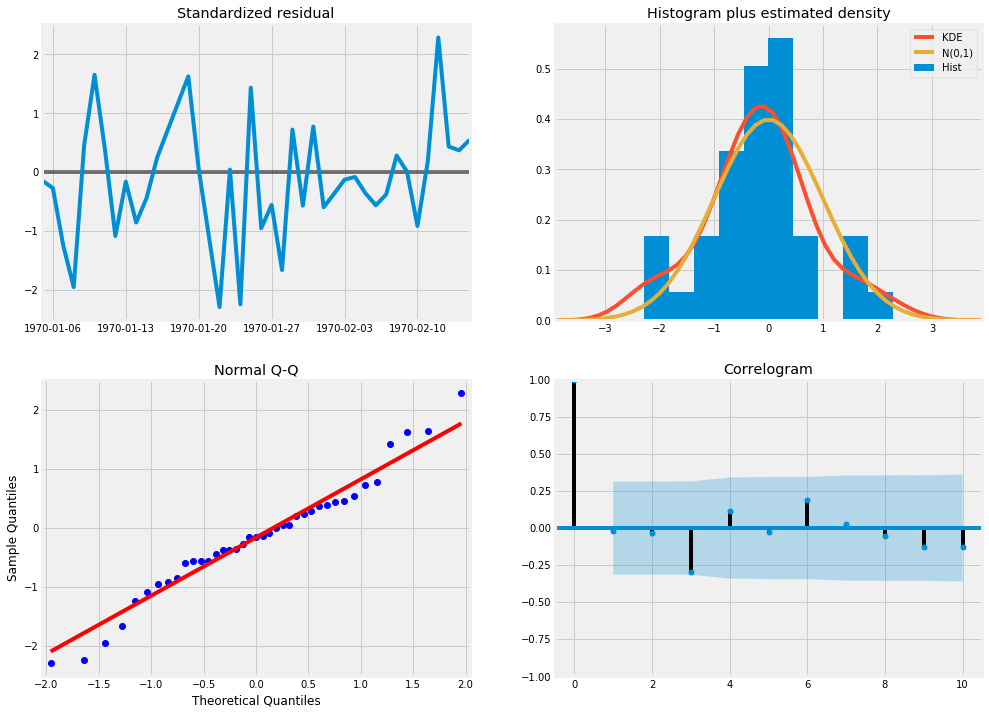

In [22]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

In [23]:
pred = results.get_prediction(start=pd.to_datetime('1970-01-05'), dynamic=False)
pred_ci = pred.conf_int()

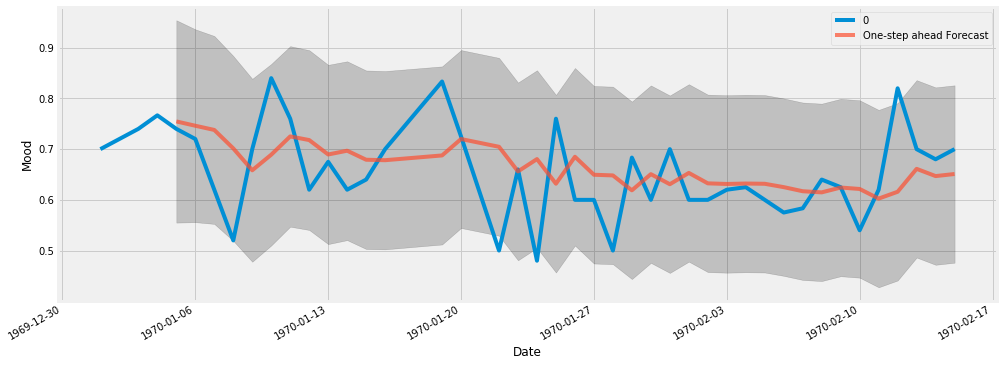

In [24]:
ax = y.plot(label='observed', figsize=(15, 6))

pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Mood')
plt.legend()

plt.show()